# Classification Of Mushrooms As Edible And Poisonous

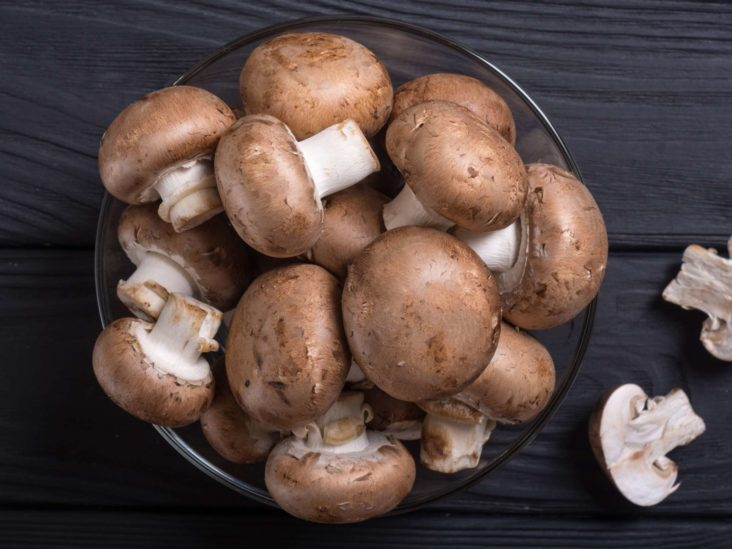

In [30]:
from IPython.display import Image
Image(filename='mushroom.jpg') 

# Importing Libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold


# Basic Data Summary

In [28]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [34]:

target = 'class'
labels = data[target]
features = data.drop(target, axis=1)
labels.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

# Splitting The Data Into Target And Features

In [10]:
X = data.iloc[:,1:23]
y = data.iloc[:,[0]]

# Encoding Categorical Features

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
for col in X.columns:
    X[col] = le.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
X.head()

<ipython-input-11-b3cee857ca71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\91819\Downloads\_temp_matlab_R2020b_win64\python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


# Splitting The Dataset Into Training And Test Set

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
lr.score(X_train, Y_train)
acc_lr = round(lr.score(X_train, Y_train) * 100, 2)
print("Logistic Regression","Accuracy",round(acc_lr,2,), "%")

Logistic Regression Accuracy 95.71 %


# KNN

In [21]:
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p =2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
classifier.score(X_train, Y_train)
acc_class = round(classifier.score(X_train, Y_train) * 100, 2)
print("KNN","Accuracy",round(acc_class,2,), "%")

KNN Accuracy 97.74 %


# SVM 

In [23]:
#classifying using SVM
from sklearn.svm import SVC
SVM= SVC(kernel='linear',random_state=0)
SVM.fit(X_train,Y_train)
# Predicting the Test set results
y_pred = SVM.predict(X_test)
SVM.score(X_train, Y_train)
acc_SVM = round(SVM.score(X_train, Y_train) * 100, 2)
print("SVM","Accuracy",round(acc_SVM,2,), "%")

SVM Accuracy 98.83 %


# Kernal SVM

In [24]:
#Classifying using kernal SVM
KSVM= SVC(kernel='rbf',random_state=0)
KSVM.fit(X_train,Y_train)
# Predicting the Test set results
y_pred = KSVM.predict(X_test)
KSVM.score(X_train, Y_train)
acc_KSVM = round(KSVM.score(X_train, Y_train) * 100, 2)
print("KSVM","Accuracy",round(acc_KSVM,2,), "%")

KSVM Accuracy 100.0 %


# Naive Bayes 

In [25]:
#Using Naive Bayes
nb= GaussianNB()
nb.fit(X_train,Y_train)
y_pred = nb.predict(X_test)
nb.score(X_train, Y_train)
acc_nb= round(nb.score(X_train, Y_train) * 100, 2)
print("Naive bayes","Accuracy",round(acc_nb,2,), "%")

Naive bayes Accuracy 92.14 %


# Decision Tree Classifier

In [26]:
#Using Decision Tree 
Decisiontree= DecisionTreeClassifier(criterion='entropy',random_state=0)
Decisiontree.fit(X_train,Y_train)
# Predicting the Test set results
y_pred = Decisiontree.predict(X_test)
Decisiontree.score(X_train, Y_train)
acc_Decisiontree= round(Decisiontree.score(X_train, Y_train) * 100, 2)
print("Decision tree classifier","Accuracy",round(acc_Decisiontree,2,), "%")

Decision tree classifier Accuracy 100.0 %


# Random Forest Classifier

In [27]:
#using Random Forest
RandomForest= RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0)
RandomForest.fit(X_train,Y_train)
# Predicting the Test set results
y_pred = RandomForest.predict(X_test)
RandomForest.score(X_train, Y_train)
acc_RandomForest= round(RandomForest.score(X_train, Y_train) * 100, 2)
print("Random Forest classifier","Accuracy",round(acc_RandomForest,2,), "%")

Random Forest classifier Accuracy 100.0 %


# Conclusion

Multiple classifier models give us a result of 100 percent that is the most accurate predictions. 
Test accuracy = 100 percent 

In [65]:
metrics.accuracy_score(y_test, y_pred)

1.0